In [ ]:
pip install opencv-python-headless scikit-image matplotlib scikit-learn


  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\swapn\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage.morphology import skeletonize
from sklearn import svm
from sklearn.model_selection import train_test_split


Successfully loaded image: /content/1__M_Left_index_finger.jpg
Successfully loaded image: /content/1__M_Right_index_finger.jpg
Successfully loaded image: /content/1__M_Right_middle_finger.jpg
Successfully loaded image: /content/1__M_Left_middle_finger.jpg
Successfully loaded image: /content/1__M_Right_little_finger.jpg
Successfully loaded image: /content/1__M_Left_little_finger.jpg


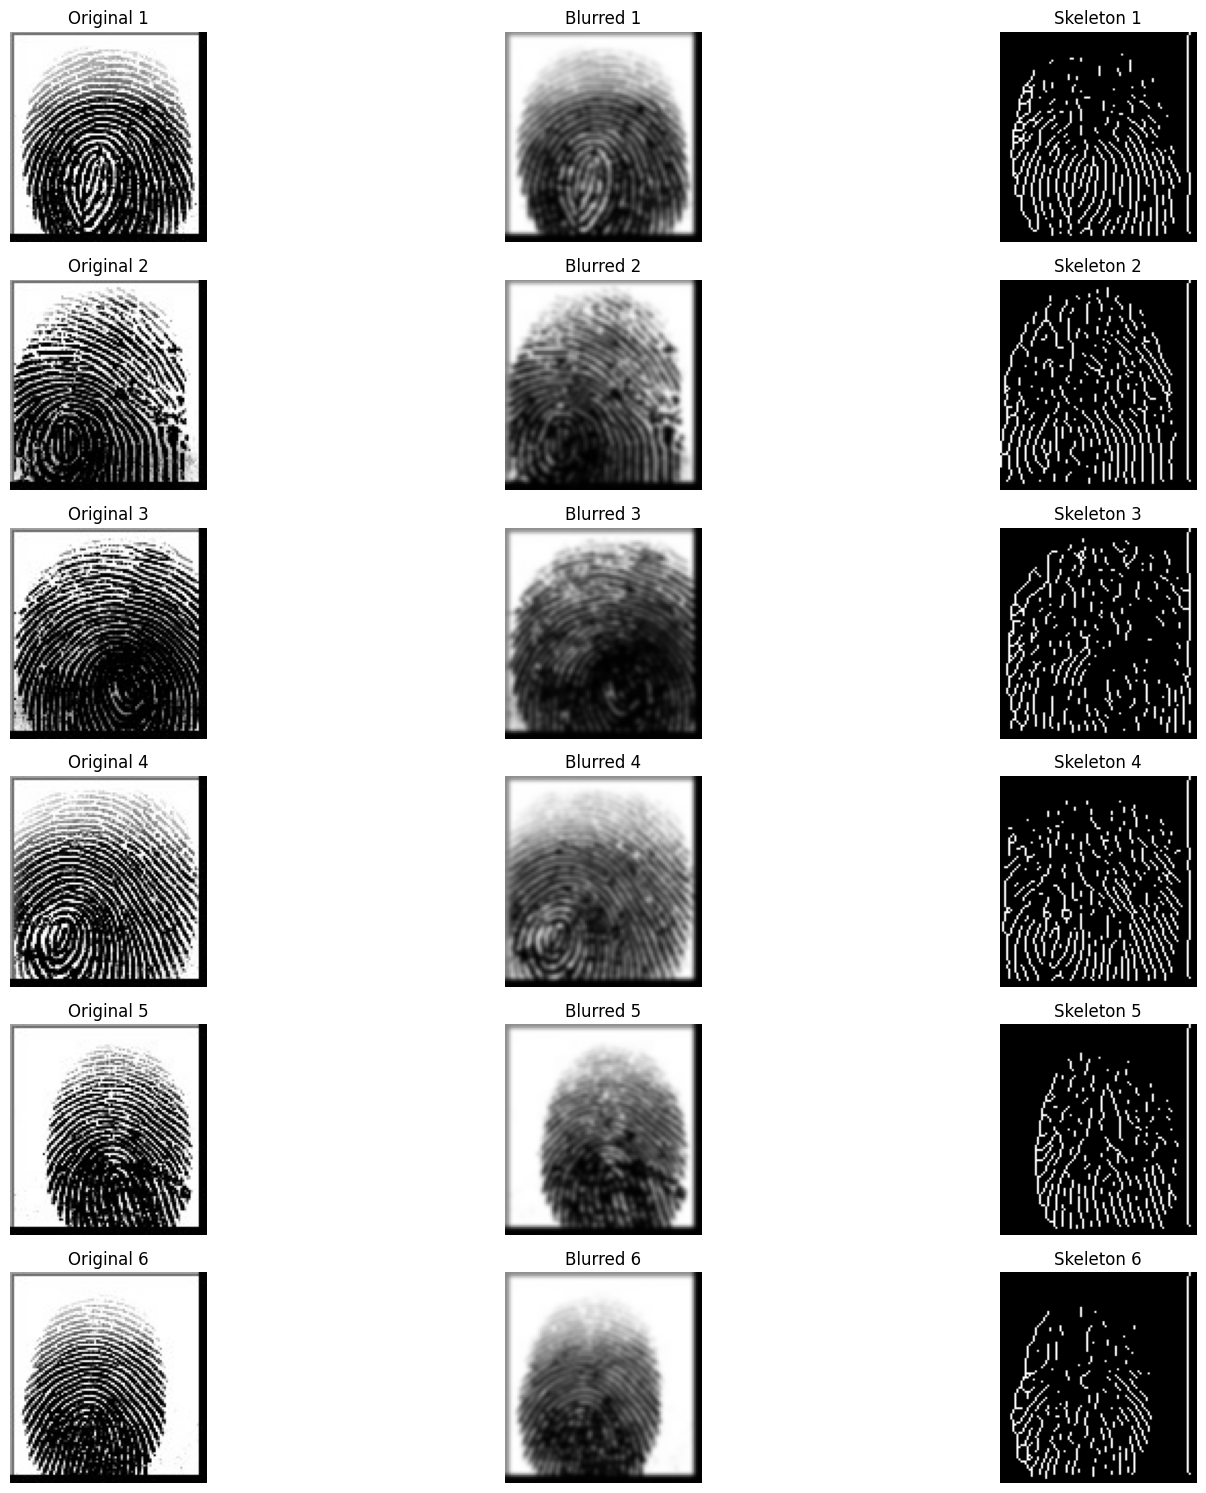

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage.morphology import skeletonize
import numpy as np
import os

def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    _, gabor_img = gabor(blurred, frequency=0.6)
    gabor_img = (gabor_img - gabor_img.min()) / (gabor_img.max() - gabor_img.min())  # Normalize
    _, binary = cv2.threshold((gabor_img * 255).astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    skeleton = skeletonize(binary // 255)
    return img, skeleton, blurred

# List of 8 image paths (ensure these paths are correct)
image_paths = [
    r"/content/1__M_Left_index_finger.jpg",
    r"/content/1__M_Right_index_finger.jpg",
    r"/content/1__M_Right_middle_finger.jpg",
    r"/content/1__M_Left_middle_finger.jpg",
    r"/content/1__M_Right_little_finger.jpg",
    r"/content/1__M_Left_little_finger.jpg",



]

for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image: {path}")
    else:
        print(f"Successfully loaded image: {path}")

# Create a single large figure to display 8 images (3 subplots per image)
plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

for idx, path in enumerate(image_paths):
    try:
        # Process each image
        original, skeleton, blurred = preprocess_image(path)

        # Plot the 3 subplots for each image in a 3-column layout
        plt.subplot(8, 3, 3*idx + 1)  # 8 rows, 3 columns, current position
        plt.imshow(original, cmap='gray')
        plt.title(f"Original {idx+1}")
        plt.axis('off')

        plt.subplot(8, 3, 3*idx + 2)  # 8 rows, 3 columns, current position
        plt.imshow(blurred, cmap='gray')
        plt.title(f"Blurred {idx+1}")
        plt.axis('off')

        plt.subplot(8, 3, 3*idx + 3)  # 8 rows, 3 columns, current position
        plt.imshow(skeleton, cmap='gray')
        plt.title(f"Skeleton {idx+1}")
        plt.axis('off')

    except FileNotFoundError as e:
        print(e)

# Display all images at once
plt.tight_layout()
plt.show()

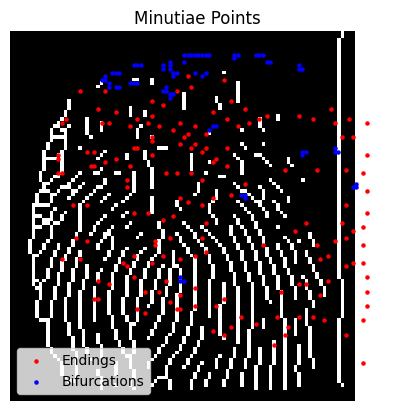

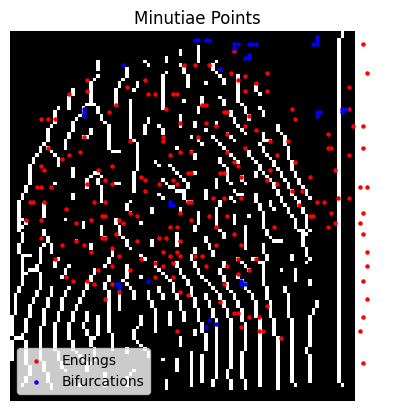

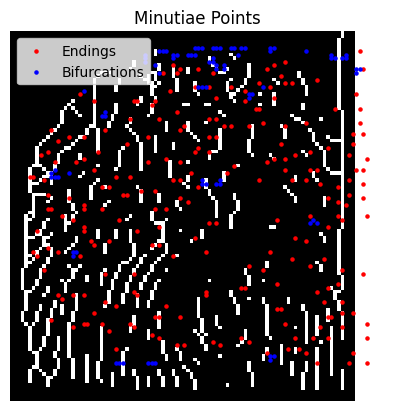

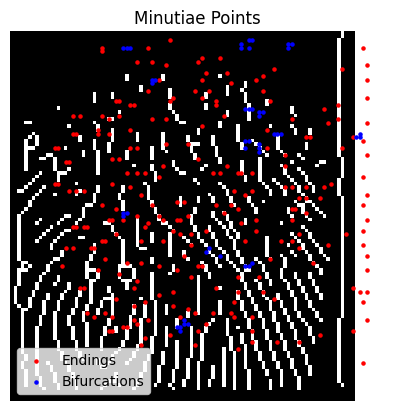

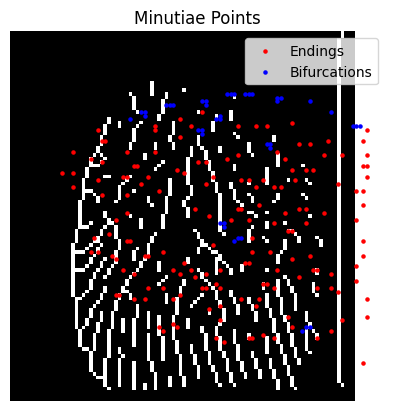

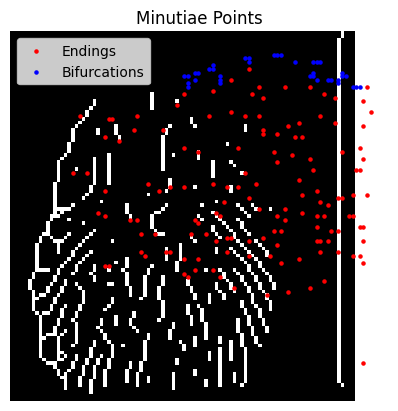

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

def extract_minutiae(skeleton):
    minutiae = []
    endings = []  # List to store ending points
    bifurcations = []  # List to store bifurcation points

    # Loop through the skeleton to find minutiae points
    for x in range(1, skeleton.shape[0] - 1):
        for y in range(1, skeleton.shape[1] - 1):
            if skeleton[x, y]:
                neighbors = skeleton[x - 1:x + 2, y - 1:y + 2]  # 3x3 neighborhood
                count = np.sum(neighbors) - 1  # Count non-zero neighbors, subtract 1 for the center pixel
                if count == 1:  # Ending point
                    minutiae.append((x, y, "ending"))
                    endings.append((x, y))
                elif count == 3:  # Bifurcation point
                    minutiae.append((x, y, "bifurcation"))
                    bifurcations.append((x, y))

    # Plotting the skeleton and minutiae points
    plt.imshow(skeleton, cmap='gray')

    # Extract x and y coordinates for endings and bifurcations
    x_end, y_end = zip(*endings) if endings else ([], [])
    x_bif, y_bif = zip(*bifurcations) if bifurcations else ([], [])

    # Scatter plot for minutiae
    plt.scatter(x_end, y_end, c='red', s=5, label='Endings')
    plt.scatter(x_bif, y_bif, c='blue', s=5, label='Bifurcations')

    # Add legend and title
    plt.legend()
    plt.title("Minutiae Points")
    plt.axis('off')
    plt.show()

    return minutiae

# Example function to process the image, extract minutiae and show the plot
def process_image(path):
    # Load the image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded successfully
    if img is None:
        print(f"Error: Image not found at {path}")
        return

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply a Gabor filter to extract features (optional)
    _, gabor_img = gabor(blurred, frequency=0.6)
    gabor_img = (gabor_img - gabor_img.min()) / (gabor_img.max() - gabor_img.min())  # Normalize

    # Apply binary thresholding
    _, binary = cv2.threshold((gabor_img * 255).astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Skeletonize the image to get ridges
    skeleton = skeletonize(binary // 255)

    # Call the extract_minutiae function and display minutiae points
    minutiae = extract_minutiae(skeleton)
    return minutiae

# Test with an image path (replace with pg"the path to your own image)
image_paths = [
    r"/content/1__M_Left_index_finger.jpg",
    r"/content/1__M_Right_index_finger.jpg",
    r"/content/1__M_Right_middle_finger.jpg",
    r"/content/1__M_Left_middle_finger.jpg",
    r"/content/1__M_Right_little_finger.jpg",
    r"/content/1__M_Left_little_finger.jpg",
]
for path in image_paths:
    process_image(path)  # Call the function to process each image


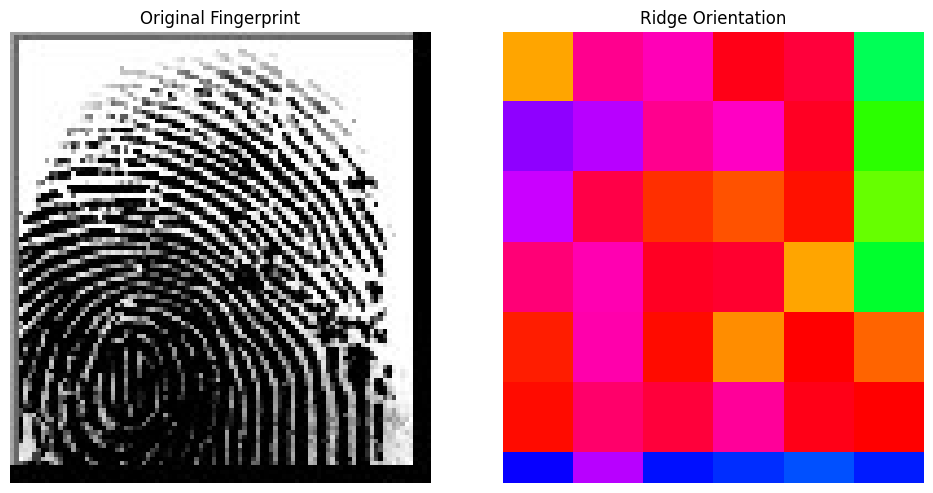

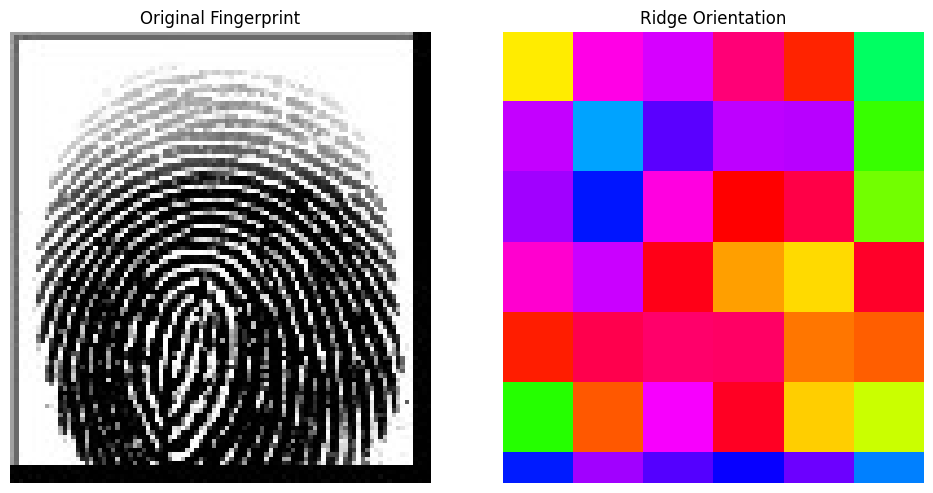

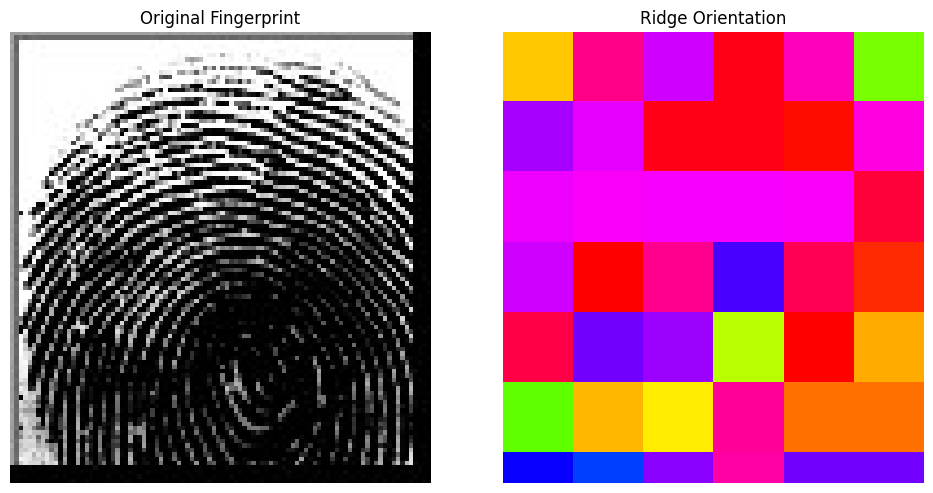

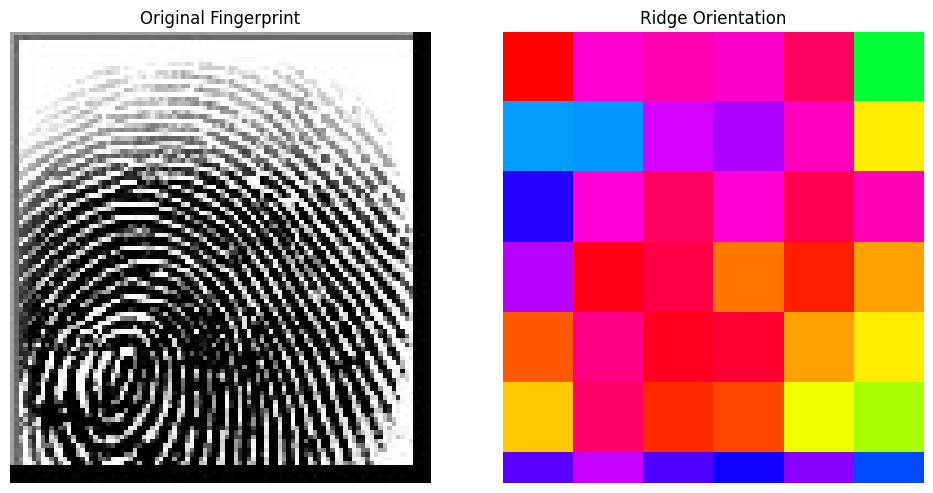

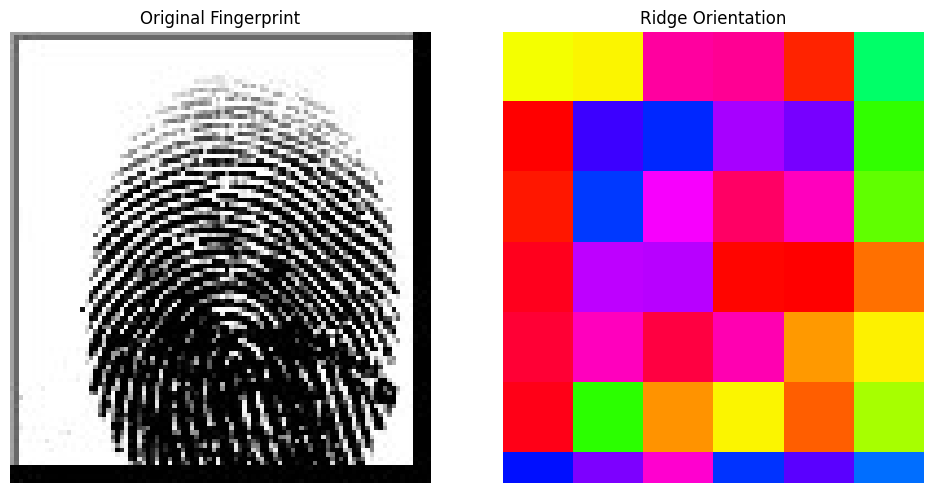

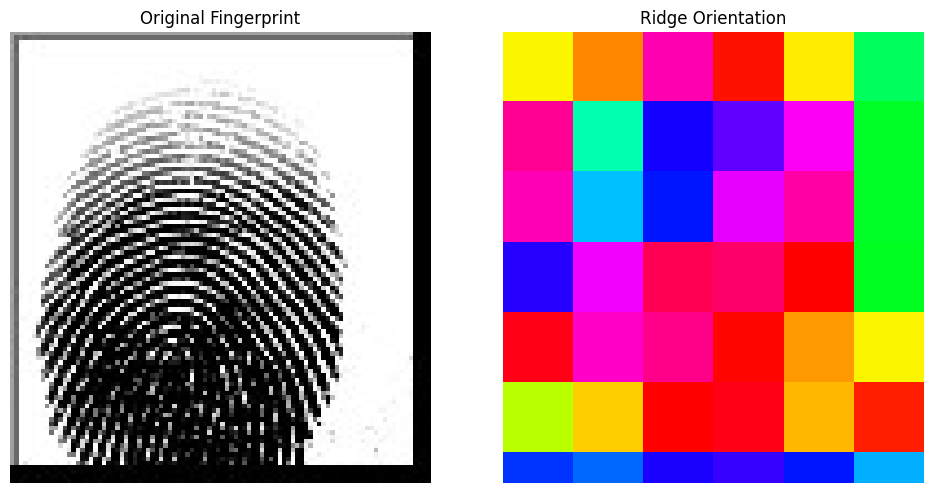

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_ridge_orientation(img, block_size=16):
    # Step 1: Compute gradients in the x and y directions using Sobel operators
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

    # Step 2: Compute the orientation of each pixel using the arctangent of the gradient components
    orientation = np.arctan2(grad_y, grad_x) * (180 / np.pi)  # Orientation in degrees

    # Step 3: Smooth the orientation image (local smoothing) for coherence
    rows, cols = img.shape
    ridge_orientation = np.zeros_like(orientation)

    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            # Define the block region
            block_orientation = orientation[i:i + block_size, j:j + block_size]

            # Calculate the average orientation in this block
            avg_orientation = np.mean(block_orientation)
            ridge_orientation[i:i + block_size, j:j + block_size] = avg_orientation

    # Step 4: Normalize the orientation image to the range [0, 180] (for visualization)
    ridge_orientation = np.mod(ridge_orientation + 180, 180)

    return ridge_orientation

# Example function to process the image and show ridge orientation
def process_image_for_orientation(path):
    # Load the image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Image not found at {path}")
        return

    # Apply Gaussian blur to smooth the image before processing
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Compute the ridge orientation
    orientation = compute_ridge_orientation(blurred_img)

    # Display the original image and the ridge orientation map
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Fingerprint")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ridge Orientation")
    plt.imshow(orientation, cmap='hsv')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage: process an image (replace with your actual image path)
image_paths = [
    r"/content/1__M_Right_index_finger.jpg",
    r"/content/1__M_Left_index_finger.jpg",
    r"/content/1__M_Right_middle_finger.jpg",
    r"/content/1__M_Left_middle_finger.jpg",
    r"/content/1__M_Right_little_finger.jpg",
    r"/content/1__M_Left_little_finger.jpg",

]

# Loop through each image path
for path in image_paths:
    process_image_for_orientation(path)



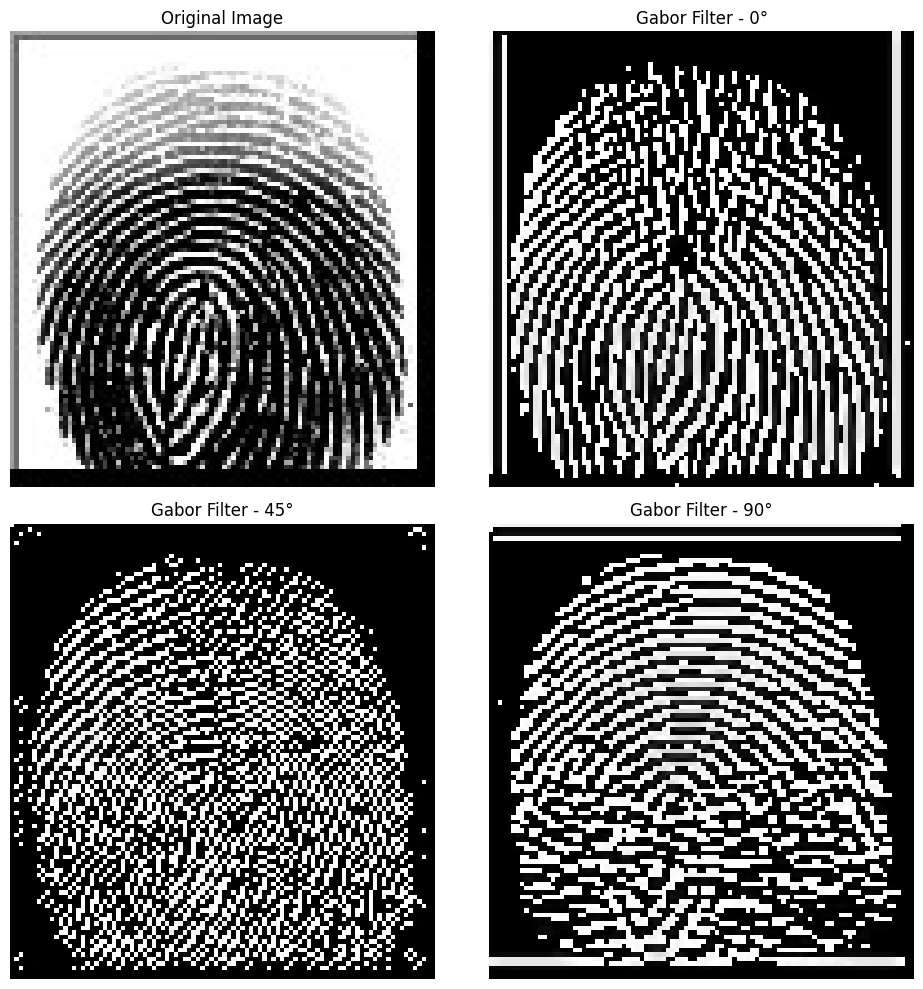

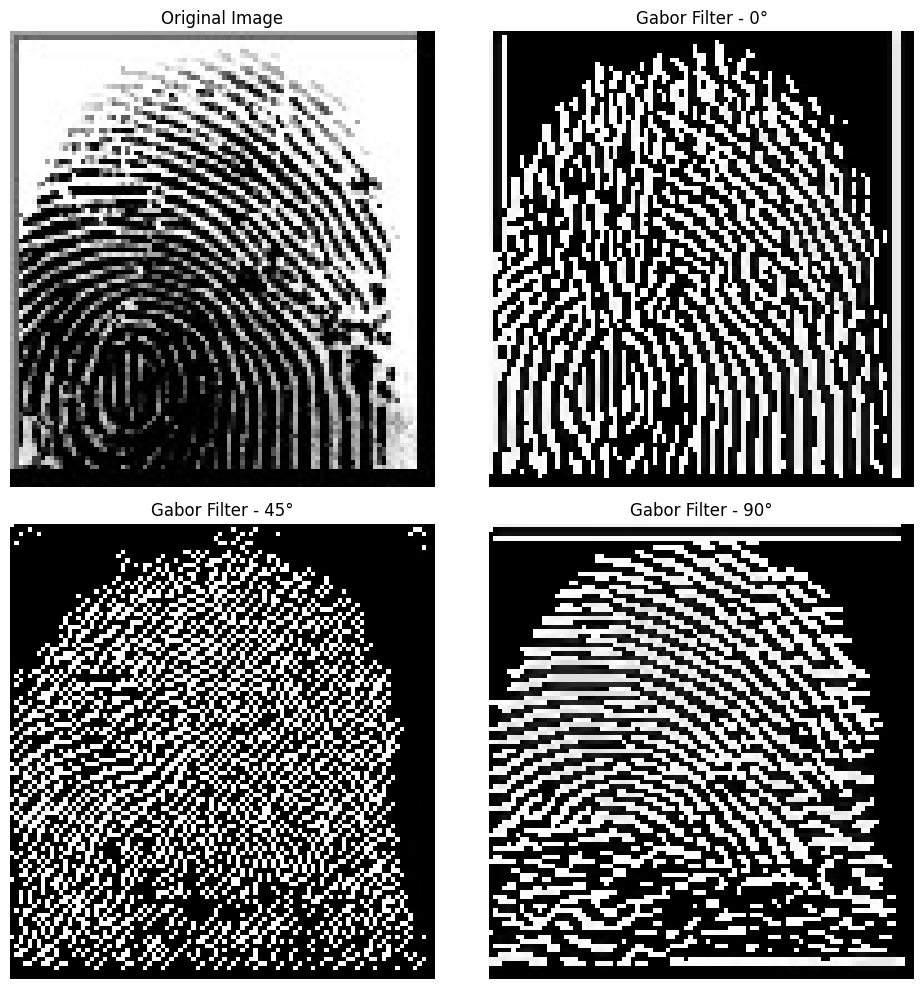

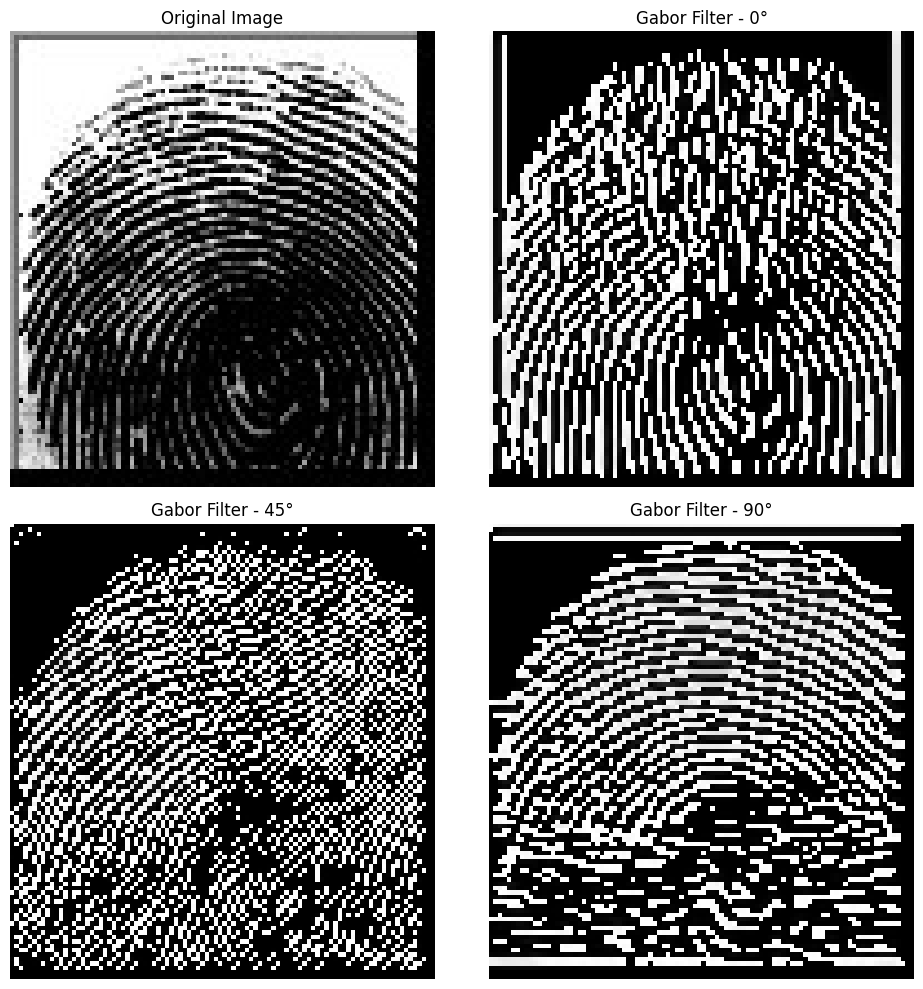

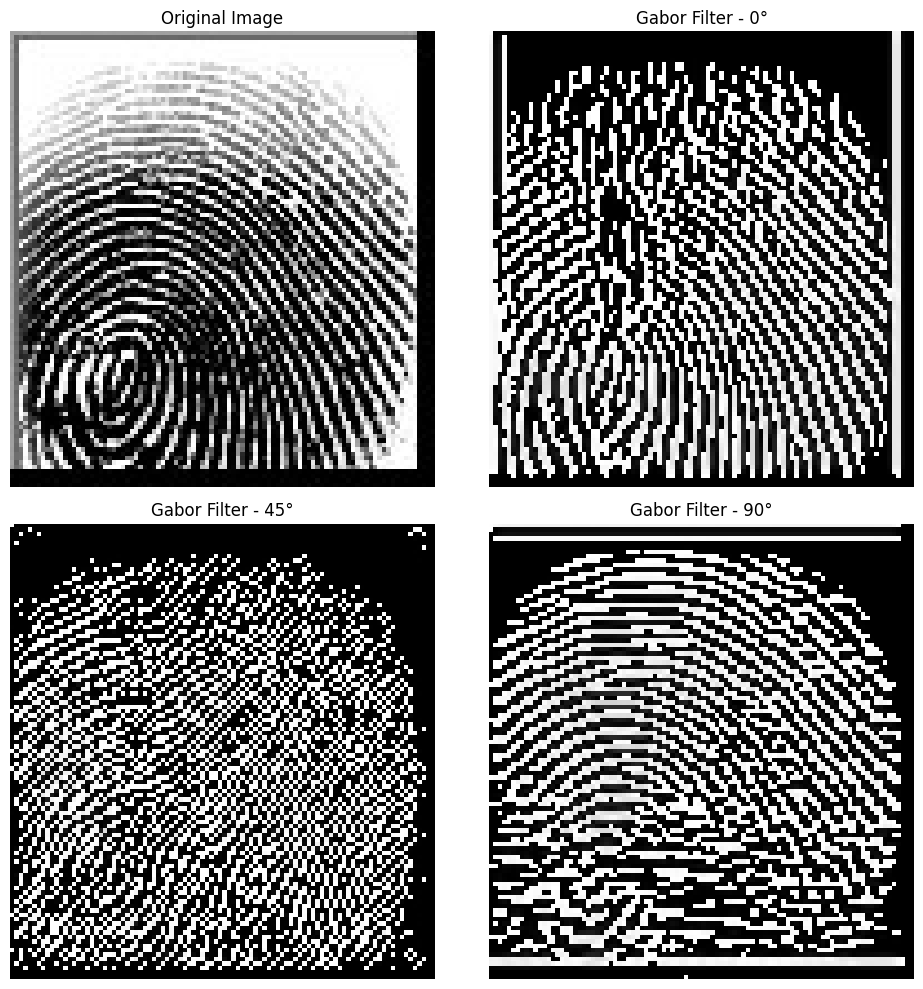

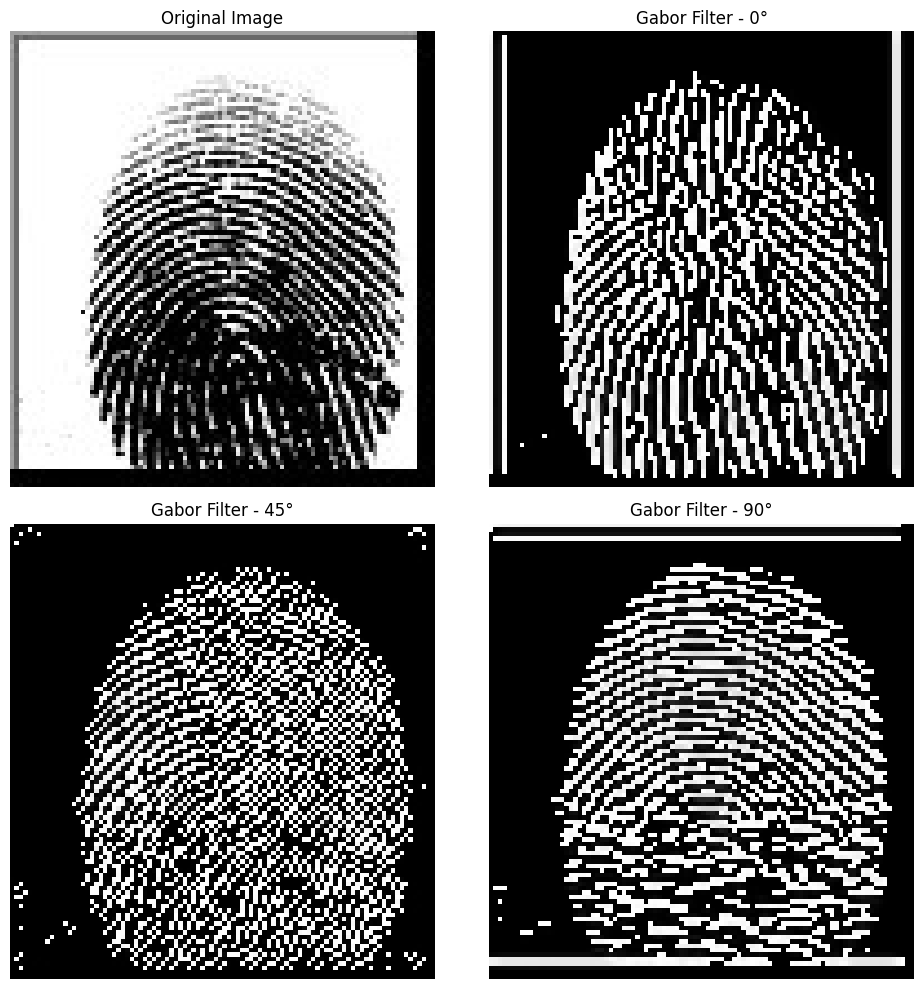

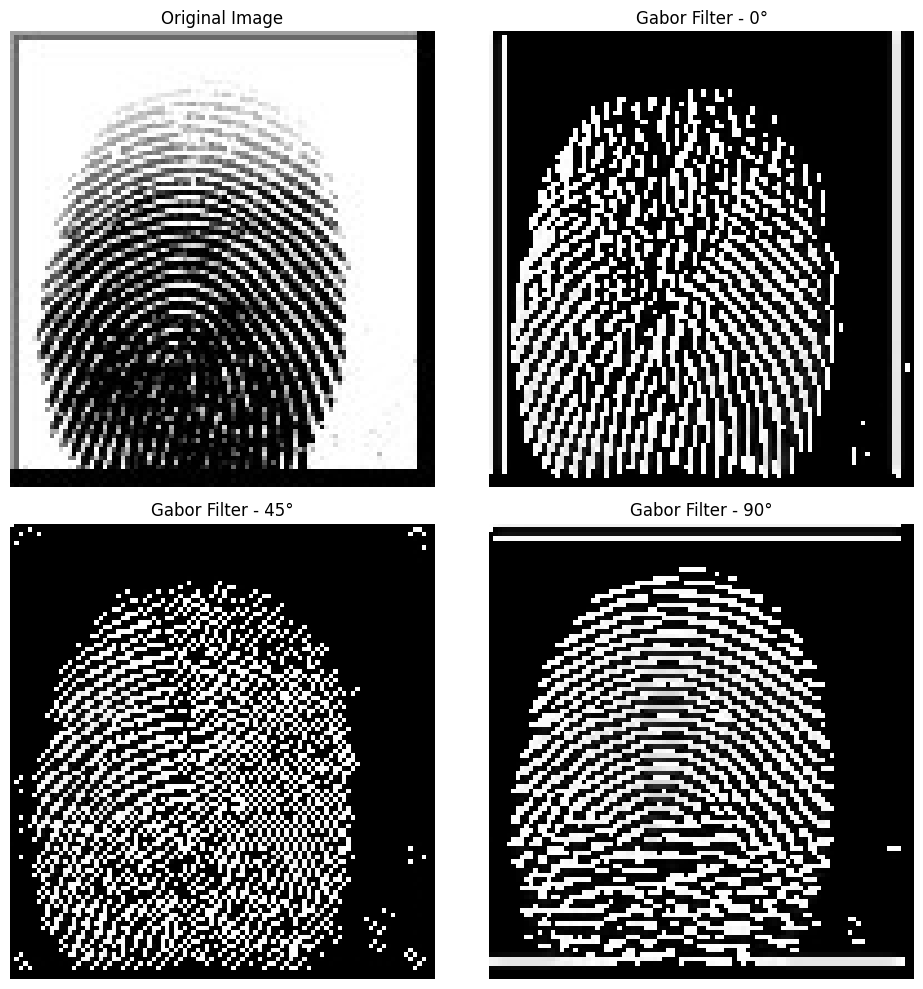

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor

def apply_gabor_filter(img, frequency=0.6, theta=0):
    """
    Apply a Gabor filter to an image.

    Parameters:
        img (ndarray): The input grayscale image.
        frequency (float): The frequency of the sinusoidal wave.
        theta (float): The orientation of the filter in radians.

    Returns:
        gabor_img (ndarray): The filtered image after applying the Gabor filter.
    """
    _, gabor_img = gabor(img, frequency=frequency, theta=theta)
    return gabor_img

# Load fingerprint image (grayscale)
image_paths = [
    r"/content/1__M_Left_index_finger.jpg",
    r"/content/1__M_Right_index_finger.jpg",
    r"/content/1__M_Right_middle_finger.jpg",
    r"/content/1__M_Left_middle_finger.jpg",
    r"/content/1__M_Right_little_finger.jpg",
    r"/content/1__M_Left_little_finger.jpg",
]

# Loop through each image path
for image_path in image_paths:
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Error: Image not found at {image_path}")
            continue  # Skip to the next image if not found

        # Apply Gabor filter to the image with different orientations
        gabor_img_0 = apply_gabor_filter(img, frequency=0.6, theta=0)  # Horizontal orientation
        gabor_img_45 = apply_gabor_filter(img, frequency=0.6, theta=np.pi/4)  # 45 degrees orientation
        gabor_img_90 = apply_gabor_filter(img, frequency=0.6, theta=np.pi/2)  # Vertical orientation

        # Display the results
        plt.figure(figsize=(10, 10))

        plt.subplot(2, 2, 1)
        plt.title("Original Image")
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 2, 2)
        plt.title("Gabor Filter - 0°")
        plt.imshow(gabor_img_0, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 2, 3)
        plt.title("Gabor Filter - 45°")
        plt.imshow(gabor_img_45, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 2, 4)
        plt.title("Gabor Filter - 90°")
        plt.imshow(gabor_img_90, cmap='gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from sklearn import svm
from sklearn.model_selection import train_test_split

# Function to apply Gabor filter to an image
def apply_gabor_filter(img, frequency=0.6, theta=0):
    _, gabor_img = gabor(img, frequency=frequency, theta=theta)
    return gabor_img

# Function to extract features (using Gabor filter responses)
def extract_features(img):
    gabor_img_0 = apply_gabor_filter(img, frequency=0.6, theta=0)
    gabor_img_45 = apply_gabor_filter(img, frequency=0.6, theta=np.pi / 4)
    gabor_img_90 = apply_gabor_filter(img, frequency=0.6, theta=np.pi / 2)

    # Combine Gabor responses (example: concatenate flattened arrays)
    feature_vector = np.concatenate([
        gabor_img_0.flatten(),
        gabor_img_45.flatten(),
        gabor_img_90.flatten()
    ])
    return feature_vector

# Dataset
image_paths = [
    r"/content/1__M_Left_index_finger.jpg",
    r"/content/1__M_Right_index_finger.jpg",
    r"/content/1__M_Right_middle_finger.jpg",
    r"/content/1__M_Left_middle_finger.jpg",
    r"/content/1__M_Right_little_finger.jpg",
    r"/content/1__M_Left_little_finger.jpg",
]
image_labels = [0, 1, 2, 3, 4, 5]  # Example labels (adjust as needed)

# Create dataset
features = []
labels = []
for image_path, label in zip(image_paths, image_labels):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Image not found at {image_path}")
            continue

        feature_vector = extract_features(img)
        features.append(feature_vector)
        labels.append(label)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Train SVM
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict (example with the first image in the dataset)
new_image_path = image_paths[0]
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_feature_vector = extract_features(new_image)
predicted_label = clf.predict([new_feature_vector])
print(f"Predicted Label: {predicted_label[0]}")  # Print the predicted label

Predicted Label: 5


In [ ]:
import cv2
import numpy as np
from skimage.filters import gabor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ... (Your existing functions: apply_gabor_filter, extract_features)

# Dataset (same as before)
image_paths = [
    r"/content/1__M_Left_index_finger.jpg",
    # ... other image paths
]
image_labels = [0, 1, 2, 3, 4, 5]  # Example labels (adjust as needed)

# ... (Code to create dataset: features and labels - same as before)

# Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Create Random Forest classifier
clf.fit(X_train, y_train)  # Train the classifier

# Predict (example with the first image in the dataset)
new_image_path = image_paths[0]
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_feature_vector = extract_features(new_image)
predicted_label = clf.predict([new_feature_vector])
print(f"Predicted Label: {predicted_label[0]}")  # Print the predicted label

Predicted Label: 4


In [ ]:
import cv2
import numpy as np
from skimage.filters import gabor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# ... (Your apply_gabor_filter and extract_features functions remain the same)

# Dataset (Your image_paths and image_labels remain the same)

# Create dataset
features = []
labels = []
for image_path, label in zip(image_paths, image_labels):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Image not found at {image_path}")
            continue

        feature_vector = extract_features(img)
        features.append(feature_vector)
        labels.append(label)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Train Random Forest with Hyperparameter Tuning and Reduced Splits (cv=3)
# Use LeaveOneOut or a smaller number of splits
# LeaveOneOut is suitable for small datasets.
# If you want to use StratifiedKFold still,
# make sure n_splits <= min(number of samples in each class)
from sklearn.model_selection import LeaveOneOut
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# Create GridSearchCV object with LeaveOneOut
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=LeaveOneOut())

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_clf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

import cv2
import numpy as np
from skimage.filters import gabor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# ... (Your apply_gabor_filter and extract_features functions remain the same)

# Dataset (Your image_paths and image_labels remain the same)

# Create dataset
features = []
labels = []
for image_path, label in zip(image_paths, image_labels):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Image not found at {image_path}")
            continue

        feature_vector = extract_features(img)
        features.append(feature_vector)
        labels.append(label)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Train Random Forest with Hyperparameter Tuning and Reduced Splits (cv=3)
# Use LeaveOneOut or a smaller number of splits
# LeaveOneOut is suitable for small datasets.
# If you want to use StratifiedKFold still,
# make sure n_splits <= min(number of samples in each class)
from sklearn.model_selection import LeaveOneOut
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# Create GridSearchCV object with LeaveOneOut
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=LeaveOneOut())


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_clf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# ... (Your apply_gabor_filter and extract_features functions remain the same)

# Dataset (Your image_paths and image_labels remain the same)

# Create dataset
features = []
labels = []
for image_path, label in zip(image_paths, image_labels):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Image not found at {image_path}")
            continue

        feature_vector = extract_features(img)
        features.append(feature_vector)
        labels.append(label)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Train Random Forest with Hyperparameter Tuning and Reduced Splits (cv=3)
# Use LeaveOneOut or a smaller number of splits
# LeaveOneOut is suitable for small datasets.
# If you want to use StratifiedKFold still,
# make sure n_splits <= min(number of samples in each class)
from sklearn.model_selection import LeaveOneOut
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# Create GridSearchCV object with LeaveOneOut
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=LeaveOneOut())

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_clf = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

SyntaxError: invalid syntax (<ipython-input-27-ea20c35fc34d>, line 61)